In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")
def leastsquares(A, b):
    import numpy.linalg as npl
    return npl.lstsq(A, b, rcond=None)[0]

In [2]:
file_1 = open("banknote_authentic.csv", "r", encoding='utf-8-sig')
csv_reader = csv.reader(file_1)

authentic = []
for row in csv_reader:
    row_1 = []
    for val in row:
        row_1.append(float(val))
    authentic.append(row_1)
     
file_2 = open("banknote_inauthentic.csv", "r", encoding='utf-8-sig')
csv_reader = csv.reader(file_2)

inauthentic = []
for row in csv_reader:
    row_2 = []
    for val in row:
        row_2.append(float(val))
    inauthentic.append(row_2)
    
banknote_data = {
    'authentic' : authentic, 'inauthentic' : inauthentic }

authentic_total = len(authentic)
inauthentic_total = len(inauthentic)
total_len = authentic_total + inauthentic_total

In [3]:
A = np.zeros((total_len, 4))
A[0:authentic_total, :] = banknote_data['authentic']
A[authentic_total:total_len, :] = banknote_data['inauthentic']
A = np.hstack([np.ones((total_len, 1)), A])
A

array([[ 1.      , -1.3971  ,  3.3191  , -1.3927  , -1.9948  ],
       [ 1.      ,  0.39012 , -0.14279 , -0.031994,  0.35084 ],
       [ 1.      , -1.6677  , -7.1535  ,  7.8929  ,  0.96765 ],
       ...,
       [ 1.      ,  0.01727 ,  8.693   ,  1.3989  , -3.9668  ],
       [ 1.      ,  3.2414  ,  0.40971 ,  1.4015  ,  1.1952  ],
       [ 1.      ,  2.2504  ,  3.5757  ,  0.35273 ,  0.2836  ]])

In [4]:
"""Calculating Least Squares and Classificaion using the authentic bank notes as our basis"""

y_authentic = np.zeros((total_len,1))
y_authentic[0:authentic_total] = 1
y_authentic[authentic_total:] = -1

x_authentic = leastsquares(A,y_authentic)
yhat_xauthentic = A @ x_authentic

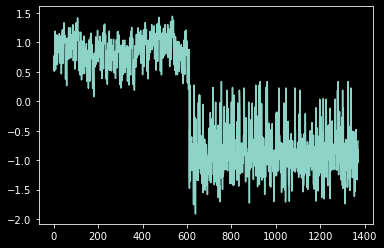

In [5]:
plt.plot(range(total_len), yhat_xauthentic)

In [6]:
def sign(yhat):
    return 2.0 * (yhat > 0) - 1.0

"""Function definitions for Performance metrics, from Table 14.1 and pg.287 in Introduction to Applied Linear Algebra"""

def error_rate(y,yhat,total_len):
    sum_fpfn = 0
    for i in range(total_len):
        if y[i] !=sign(yhat[i]):
            sum_fpfn += 1
    return sum_fpfn/total_len

def true_positive(y,yhat,total_len):
    sum_tp = 0
    sum_p = 0
    for i in range(total_len):
        if y[i] == 1:
            sum_p += 1
            if sign(yhat[i]) == 1:
                sum_tp += 1
    return sum_tp/sum_p
        
def false_positive(y,yhat,total_len):
    sum_fp = 0
    sum_n = 0
    for i in range(total_len):
        if y[i] != 1:
            sum_n += 1
            if sign(yhat[i]) == 1:
                sum_fp += 1
    return sum_fp/sum_n

def true_negative(y,yhat,total_len):
    sum_tn = 0
    sum_n = 0
    for i in range(total_len):
        if y[i] != 1:
            sum_n += 1
            if sign(yhat[i]) !=1:
                sum_tn += 1
    return sum_tn/sum_n
         
def precision(y,yhat,total_len):
    sum_tp = 0
    sum_fp = 0
    for i in range(total_len):
        if y[i] == 1 and sign(yhat[i]) == 1:
            sum_tp += 1
        if y[i] != 1 and sign(yhat[i]) == 1:
            sum_fp += 1
    return sum_tp/(sum_tp + sum_fp)

In [7]:
"""Calculating Least Squares and Classificaion using the inauthentic bank notes as our basis"""
y_inauthentic = np.zeros((total_len, 1))
y_inauthentic[0:authentic_total] = -1
y_inauthentic[authentic_total: total_len] = 1
x_inauthentic = leastsquares(A, y_inauthentic)
yhat_xinauthentic = A @ x_inauthentic

In [8]:
print(error_rate(y_authentic,yhat_xauthentic,total_len), error_rate(y_inauthentic,yhat_xinauthentic,total_len))
print(true_positive(y_authentic,yhat_xauthentic,total_len), true_positive(y_inauthentic,yhat_xinauthentic,total_len))
print(false_positive(y_authentic,yhat_xauthentic,total_len), false_positive(y_inauthentic,yhat_xinauthentic,total_len))
print(true_negative(y_authentic,yhat_xauthentic,total_len), true_negative(y_inauthentic,yhat_xinauthentic,total_len))
print(precision(y_authentic,yhat_xauthentic,total_len), precision(y_inauthentic,yhat_xinauthentic,total_len))

0.023323615160349854 0.023323615160349854
1.0 0.958005249343832
0.04199475065616798 0.0
0.958005249343832 1.0
0.9501557632398754 1.0


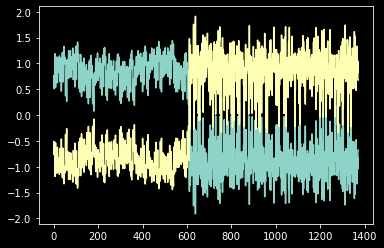

In [9]:
plt.plot(range(total_len), yhat_xauthentic, yhat_xinauthentic)

In [159]:
"""Combined 2 classifiers into a single classifier"""

def fhat(row):
    y_authentic = row @ x_authentic
    y_inauthentic = row @ x_inauthentic
    outs = [y_authentic, y_inauthentic]
    if max(outs) == y_authentic:
        return 'authentic'
    else:
        return 'inauthentic'

In [160]:
correct = ['authentic'] * authentic_total +  ['inauthentic'] * inauthentic_total

yhat_final = np.array([fhat(A[i, :]) for i in range(total_len)])
error_rate_final = sum(yhat_final != np.array(correct))/total_len

In [161]:
print(error_rate_final)

0.023323615160349854
